<a href="https://colab.research.google.com/github/zdvinkofff/Developer-AI/blob/main/%22OpenCV2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнения на маски и зоны интереса

## Инструкция по выполнению задания

>








Ниже находится несколько  упражнений, представляющих собой код с пропущенными фрагментами, которые надо воспроизвести. Часть из этих упражнений очень простые, над некоторыми надо хорошенько подумать.

Чтобы выполнить это задание, нужно сохранить копию файла себе на Google Диск.


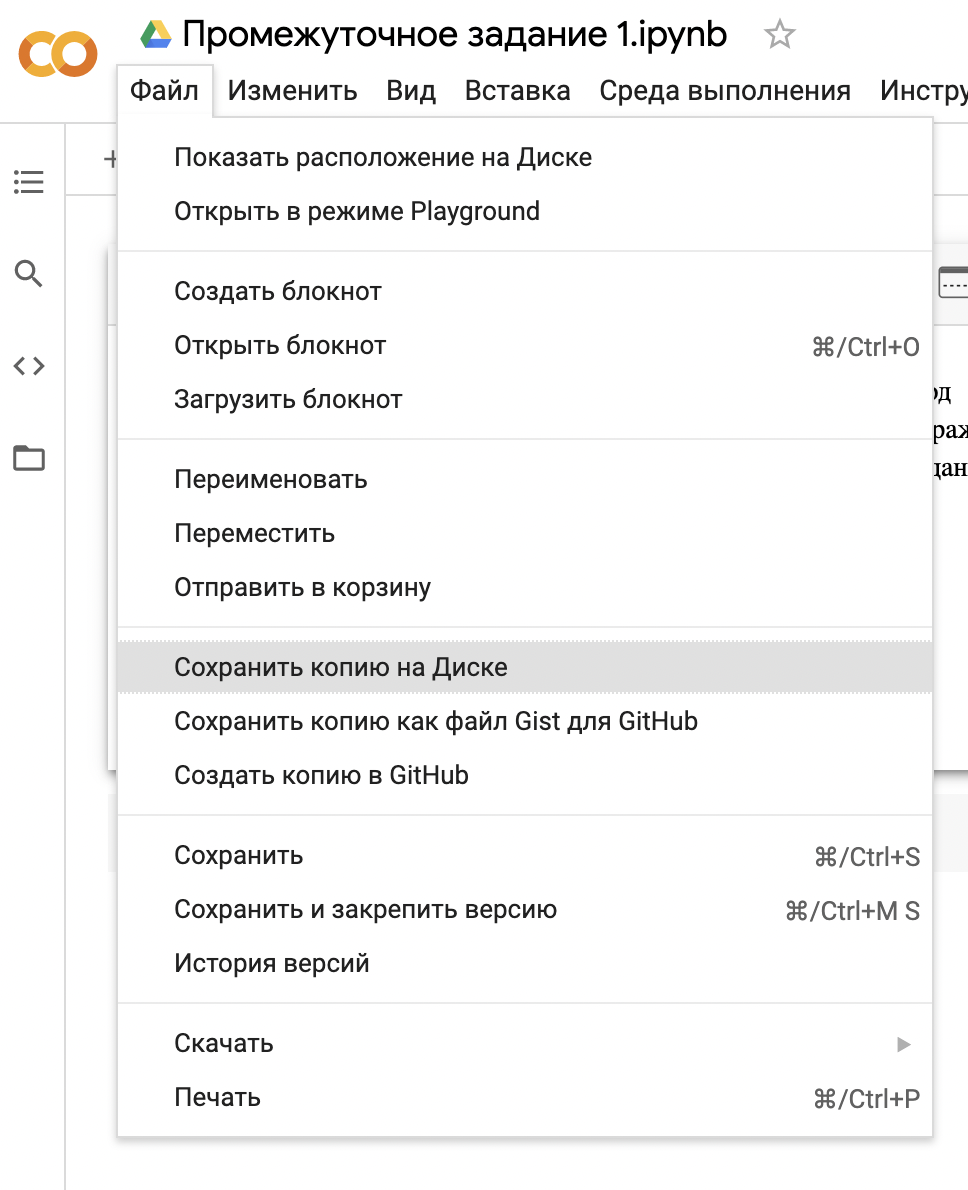


После выполнения задания, его нужно отправить на проверку. Для этого достаточно предоставить доступ к файлу и отправить ссылку в соответствующее поле LMS курса.


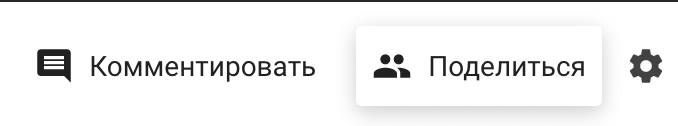
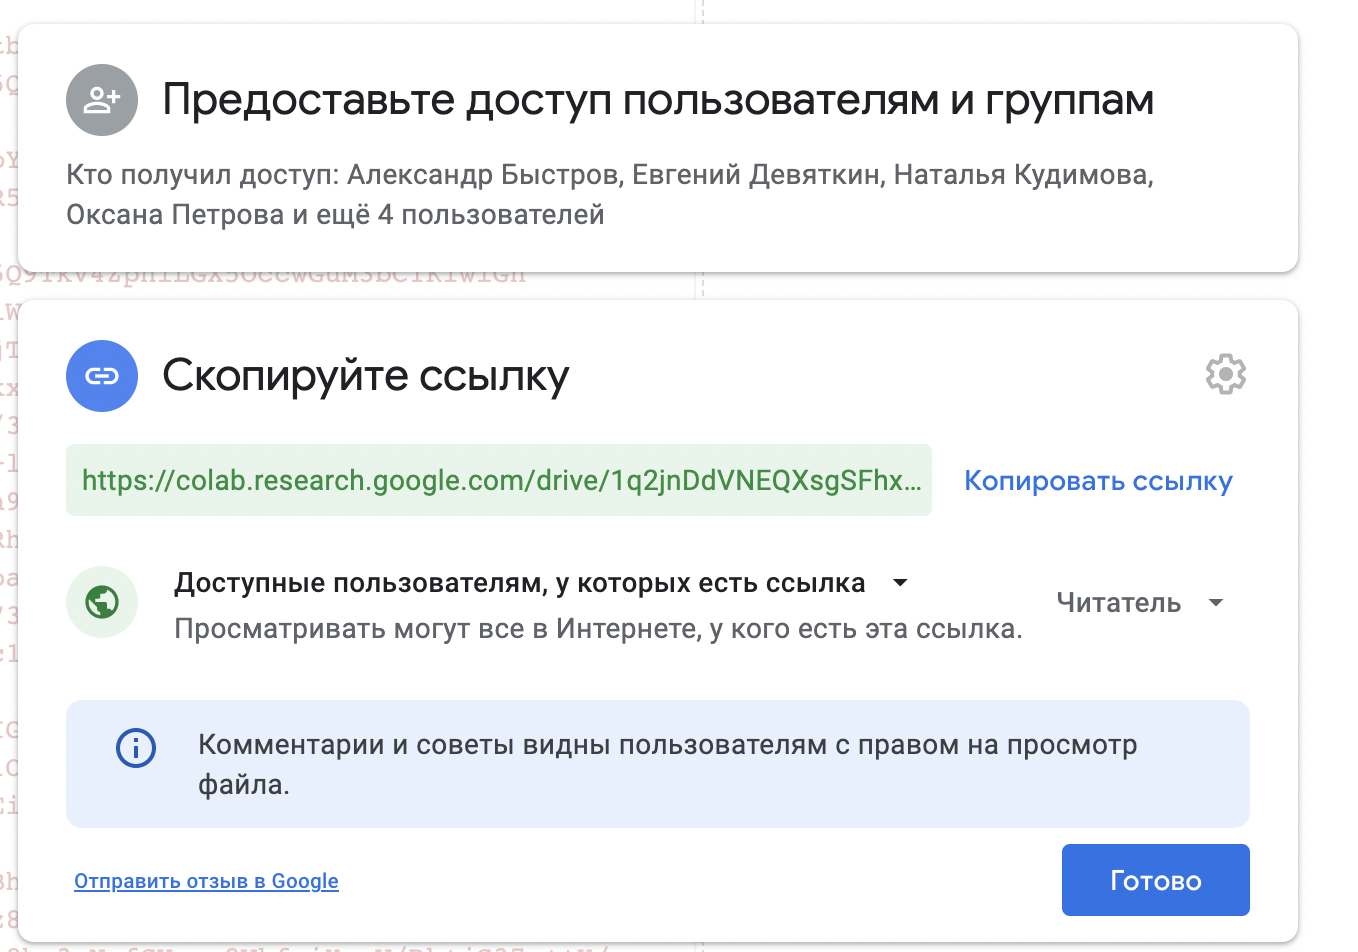

Удачи в выполнении заданий!

## Немного теории
Обработка изображений, особенно методами машинного обучения может требовать немало ресурсов, особенно, если мы работаем с видеопотоками в режиме реального времени. Кроме того, иногда важные элементы на изображении располагаются в определенной его части, в то время как остальная часть изображения не играет особой роли для нашей задачи. Тогда принято выделять эту интеересующую часть изображения и обрабатывать именно ее. Эту часть принято называть областью интереса (ROI, Region of Interest).

И наоборот, иногда какую-то часть изображения нужно изолировать, чтобы алгоритмы не обрабатывали ее. Например, у представим себе систему мониторинга лесных пожаров, которая с помощью видеокамер, установленных на вышках сотовой связи, фиксирует наличиее задымления над лесом. И где-то вдалеке начинается поселок, где расположена котельная, отапливающаая поселок. Выбросы из трубы котельной не должны приводить к срабатыванию системы, поэтому на область изображения из видеопотока накладывают маску - пиксели этой части изображения заменяются ккаким-либо нейтральным цветом прежде чем кадр попадает на обработку в основной алгоритм системы мониторинга.

В этом задании мы научимся выделять и видоизменять области интереса, а также закрывать (закрашивать) масками определенные части изображения.

Для этого нам понадобится библиотека OpenCV и понимание того, что из себя представляет массив пикселей изображения.

## Импортируем библиотеки

In [ ]:
import cv2 # импортируем OpenCV
from matplotlib import pyplot as plt # импортируем matplotlib
import numpy as np # импортируем numpy

### Упражнение 1
Займемся областью интереса. Загрузите цветное изображение [мема](https://drive.google.com/file/d/1DyexyEJ1YNY8S5ayib1_ZxBopevYZt97/view?usp=sharing) и выведите его на экран средствами openCV и matplotlib. Помните, что по умолчанию библиотека openCV цветное изображение воспринимает как BGR (картинка будет выглядеть синей, скорее всего), а не RGB. Для нормального отображения нужно дополнительно преобразовать цветовую схему.

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/2 (1).png', cv2.IMREAD_COLOR)
cv2_imshow(img)
img.shape

### Упражнение 2
Сделаем лицо Гарри Поттера областью интереса. Подберите вручную координаты области и выведите эту область в виде отдельного изображения.

Помните, что при указании координат в изображении с помощью квадратных скобок сперва идут строки, а потом столбцы, т.е. сперва значения У, а уже потом Х.

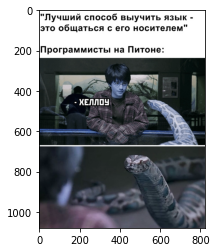

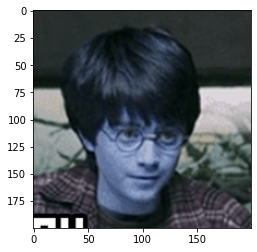

In [ ]:
plt.imshow(img)
plt.show()
garry = img[250:450, 300:500]
plt.imshow(garry)
plt.show()

### Упражнение 3
Теперь давайте изменим значения пикселей в области интереса. Сделайте так, чтобы область интереса на изображении мема стала черно-белой, а все остальные пиксели остались прежними.

Помните, что черно-белое (в оттенках серого) изображение содержит по одному числу для характеристики цвета пикселя, в то время как цветное изображение имеет три числа. Чтобы поместить черно-белое изображение в область интереса цветной картинки, нужно, чтобы размерность массивов совпадала.

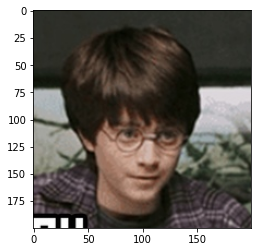

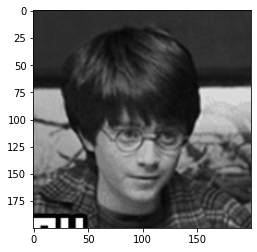

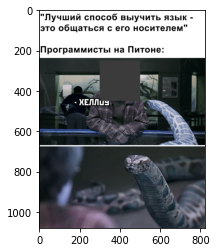

In [ ]:
img2 = cv2.cvtColor(garry, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()
black = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(black, cmap='gray')
plt.show()
wr_img = cv2.cvtColor(black, cv2.COLOR_GRAY2RGB)
plt.imshow(wr_img)

for i in range(0, wr_img.shape[0]):
  for j in range(wr_img.shape[1]):
    img[250:450, 300:500] = wr_img[i][j]
plt.imshow(img)




### Упражнение 4
Если справились с предыдущим упражнением, то давайте получим противоположную картинку: черно-белое изображение с цветной областью интереса.

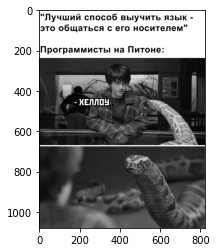

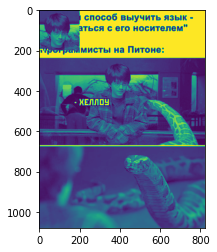

In [ ]:
img = cv2.imread('/content/2 (1).png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')
plt.show()
garry_new = img[250:450, 300:500]
plt.imshow(garry_new)
wr_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
garry = cv2.cvtColor(garry_new, cv2.COLOR_BGR2RGB)
for i in range(0, garry.shape[0]):
  for j in range(garry.shape[1]):
    img[i][j] = garry_new[i][j]
plt.imshow(img)




### Упражнение 5
Перейдем к маскам. Часто можно встретить маски на трансляциях уличных веб-камер. Там они обычно закрывают рекламные билборды. Давайте и мы с вами закроем билборды на [изображении](https://www.volgatech.net/upload/iblock/caa/ilg0anu3c0oxofqlvr3to72a0ws3ag2m.png). Закрасьте два билборда черным цветом. Выведите результат.

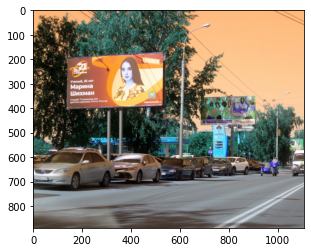

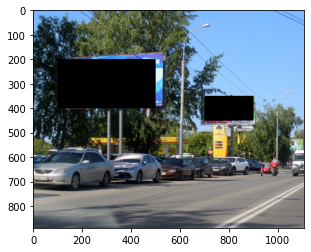

In [ ]:
img = cv2.imread('/content/ilg0anu3c0oxofqlvr3to72a0ws3ag2m.png', cv2.IMREAD_COLOR)
img.shape
plt.imshow(img)
plt.show()
bilbord = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(bilbord)
output = bilbord.copy()
cv2.rectangle(output, (100, 200), (500, 400), (0, 0, 0), -1)
cv2.rectangle(output, (700, 350), (900, 450), (0, 0, 0), -1)
plt.imshow(output)